Worked on Instagram Dataset to identify the factors driving higher engagement and conversion rates to optimize posting strategies and hashtag use.


**Performance Analysis:** To evaluate which types of posts perform well in terms of impressions, likes, saves, and other metrics.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/Instagram data.csv')

Data Validation

In [ ]:
df.head()

,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,Caption,Hashtags
0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,48,10,20.833333,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,62,12,19.354839,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,2021-12-13,4528,2700,621,932,73,172,10,7,213,23,8,34.782609,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2021-12-14,2518,1704,255,279,37,96,5,4,123,8,0,0.000000,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
for i in df.columns:
  print(df[i].value_counts())

Date
2021-12-10    1
2021-12-11    1
2022-04-01    1
2022-04-02    1
2022-04-03    1
             ..
2022-02-08    1
2022-02-09    1
2022-02-10    1
2022-02-11    1
2022-06-03    1
Name: count, Length: 176, dtype: int64
Impressions
5394     3
4082     2
4002     2
3015     2
3924     2
        ..
4467     1
3388     1
4978     1
3988     1
12213    1
Name: count, Length: 158, dtype: int64
From Home
1975    3
2275    2
2244    2
2415    2
2608    2
       ..
2190    1
1780    1
2508    1
1910    1
4926    1
Name: count, Length: 152, dtype: int64
From Hashtags
1938    3
2975    2
2351    2
771     2
1278    2
       ..
3090    1
166     1
1880    1
1018    1
1384    1
Name: count, Length: 156, dtype: int64
From Explore
45      3
84      3
115     2
1604    2
121     2
       ..
166     1
36      1
69      1
492     1
5557    1
Name: count, Length: 151, dtype: int64
From Other
34     4
26     3
73     3
32     3
72     3
      ..
238    1
655    1
168    1
300    1
112    1
Name: count, L

In [ ]:
df.shape

(176, 15)

In [ ]:
df.isnull().sum()

,0
Date,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0


In [ ]:
# duplicates = df.columns[df.T.duplicated()]
# print("Duplicate Columns:", list(duplicates))
l = []
column_list =df.columns
for i in column_list:
  k=i.lower()
  l.append(k)
# print(l)

# Finding duplicates
seen = set()
duplicates = set(x for x in l if x in seen or seen.add(x))

print("Duplicate values:", duplicates)


Duplicate values: set()


Here in the dataset we have 'Hashtags' column that is not presented in a formatted way, so we split that data into list format then later we added the 'datascience', 'fullstack' and 'others' columns based on the categories.

In [ ]:

import pandas as pd
import re

# Function to clean and split hashtags
def clean_and_split_hashtags(hashtags):
    if isinstance(hashtags, str):
        cleaned = re.sub(r'[^\w# ]+', '', hashtags)
        return [tag.strip() for tag in cleaned.split('#') if tag.strip()]
    return []

# Apply cleaning and splitting
df['Hashtag_List'] = df['Hashtags'].apply(clean_and_split_hashtags)

# Define categories for hashtags
datascience_tags = [
    'data', 'datascience', 'dataanalysis', 'dataanalytics', 'datascientist',
    'machinelearning', 'artificialintelligence', 'ai', 'dataanalyst'
]
fullstack_tags = ['python', 'pythonprogramming', 'pythonprojects', 'pythoncode', 'thecleverprogrammer']
others_tags = [
    'finance', 'money', 'business', 'investing', 'investment', 'trading',
    'stockmarket', 'amankharwal'
]

# Create columns based on categories
df['datascience'] = df['Hashtag_List'].apply(
    lambda x: ' '.join([tag for tag in x if tag in datascience_tags])
)
df['fullstack'] = df['Hashtag_List'].apply(
    lambda x: ' '.join([tag for tag in x if tag in fullstack_tags])
)
df['others'] = df['Hashtag_List'].apply(
    lambda x: ' '.join([tag for tag in x if tag in others_tags])
)

# Display the resulting DataFrame
print("Cleaned DataFrame:")
print(df[['Hashtags', 'Hashtag_List', 'datascience', 'fullstack', 'others']])


Cleaned DataFrame:
                                              Hashtags  \
0    #finance #money #business #investing #investme...   
1    #healthcare #health #covid #data #datascience ...   
2    #data #datascience #dataanalysis #dataanalytic...   
3    #python #pythonprogramming #pythonprojects #py...   
4    #datavisualization #datascience #data #dataana...   
..                                                 ...   
171  #machinelearning #machinelearningalgorithms #d...   
172  #datascience #datasciencejobs #datasciencetrai...   
173  #datascience #datasciencejobs #datasciencetrai...   
174  #datascience #datasciencejobs #datasciencetrai...   
175  #python #pythonprogramming #pythoncode #python...   

                                          Hashtag_List  \
0    [finance, money, business, investing, investme...   
1    [healthcare, health, covid, data, datascience,...   
2    [data, datascience, dataanalysis, dataanalytic...   
3    [python, pythonprogramming, pythonprojects, py.

In [ ]:
df.head()

,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,Caption,Hashtags,Hashtag_List,datascience,fullstack,others
0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,Here are some of the most important data visua...,#finance #money #business #investing #investme...,"[finance, money, business, investing, investme...",data datascience dataanalysis dataanalytics da...,python pythonprogramming pythonprojects python...,finance money business investing investment tr...
1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,48,10,20.833333,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,"[healthcare, health, covid, data, datascience,...",data datascience dataanalysis dataanalytics da...,python pythonprogramming pythonprojects python...,amankharwal
2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,62,12,19.354839,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,"[data, datascience, dataanalysis, dataanalytic...",data datascience dataanalysis dataanalytics da...,python pythonprogramming pythonprojects python...,amankharwal
3,2021-12-13,4528,2700,621,932,73,172,10,7,213,23,8,34.782609,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,"[python, pythonprogramming, pythonprojects, py...",,python pythonprogramming pythonprojects python...,amankharwal
4,2021-12-14,2518,1704,255,279,37,96,5,4,123,8,0,0.000000,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,"[datavisualization, datascience, data, dataana...",datascience data dataanalytics machinelearning...,python pythonprogramming thecleverprogrammer,business amankharwal


In [ ]:
df['datascience'].value_counts()

,count
datascience,
data datascience dataanalysis dataanalytics datascientist machinelearning artificialintelligence ai,55
,37
datascience data dataanalysis dataanalytics datascientist machinelearning artificialintelligence ai,32
machinelearning datascience dataanalysis dataanalytics datascientist artificialintelligence ai,10
datascience machinelearning ai dataanalytics data artificialintelligence,6
datascience data dataanalytics machinelearning dataanalysis artificialintelligence datascientist ai dataanalyst,5
machinelearning,5
data datascience dataanalysis dataanalytics datascientist machinelearning artificialintelligence ai dataanalyst,4
machinelearning artificialintelligence ai datascience datascientist data,4


In [ ]:
datalist = [
    'artificialintelligence', float('nan'), 'artificialintelligence', 'artificialintelligence',
    'artificialintelligence', 'machinelearning', 'artificialintelligence',
    'artificialintelligence', 'artificialintelligence', 'artificialintelligence',
    'artificialintelligence', 'artificialintelligence', 'artificialintelligence',
    'datascience', 'artificialintelligence', 'machinelearning'
]

d = {}

datascience_counts = df['datascience'].value_counts()

for i, (label, count) in enumerate(datascience_counts.items()):
        d[label] = datalist[i]

df['datascience1'] = df['datascience'].map(d)

print(df[['datascience1']])


               datascience1
0    artificialintelligence
1    artificialintelligence
2    artificialintelligence
3                       NaN
4           machinelearning
..                      ...
171  artificialintelligence
172  artificialintelligence
173  artificialintelligence
174  artificialintelligence
175                     NaN

[176 rows x 1 columns]


In [ ]:
df.isnull().sum()

,0
Date,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0


In [ ]:
df['others'].value_counts()

,count
others,
amankharwal,158
business amankharwal,9
amankharwal business,4
finance money business investing investment trading stockmarket amankharwal,1
stockmarket investing trading money investment finance,1
stockmarket investing trading money investment finance amankharwal,1
business,1
amankharwal finance business money investing,1


In [ ]:
datalist = ['amankharwal', 'business', 'business', 'business', 'stockmarket', 'stockmarket', 'business', 'business']

d = {}

others_counts = df['others'].value_counts()

for i, (label, count) in enumerate(others_counts.items()):
        d[label] = datalist[i]

df['others1'] = df['others'].map(d)

print(df[['others1']])


         others1
0       business
1    amankharwal
2    amankharwal
3    amankharwal
4       business
..           ...
171  amankharwal
172  amankharwal
173  amankharwal
174  amankharwal
175  amankharwal

[176 rows x 1 columns]


In [ ]:
df

,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,...,Follows,Conversion Rate,Caption,Hashtags,Hashtag_List,datascience,fullstack,others,datascience1,others1
0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,...,2,5.714286,Here are some of the most important data visua...,#finance #money #business #investing #investme...,"[finance, money, business, investing, investme...",data datascience dataanalysis dataanalytics da...,python pythonprogramming pythonprojects python...,finance money business investing investment tr...,artificialintelligence,business
1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,...,10,20.833333,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,"[healthcare, health, covid, data, datascience,...",data datascience dataanalysis dataanalytics da...,python pythonprogramming pythonprojects python...,amankharwal,artificialintelligence,amankharwal
2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,...,12,19.354839,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,"[data, datascience, dataanalysis, dataanalytic...",data datascience dataanalysis dataanalytics da...,python pythonprogramming pythonprojects python...,amankharwal,artificialintelligence,amankharwal
3,2021-12-13,4528,2700,621,932,73,172,10,7,213,...,8,34.782609,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,"[python, pythonprogramming, pythonprojects, py...",,python pythonprogramming pythonprojects python...,amankharwal,NaN,amankharwal
4,2021-12-14,2518,1704,255,279,37,96,5,4,123,...,0,0.000000,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,"[datavisualization, datascience, data, dataana...",datascience data dataanalytics machinelearning...,python pythonprogramming thecleverprogrammer,business amankharwal,machinelearning,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2022-05-30,226323,6698,7341,208595,3419,1554,18,94,1380,...,1236,62.361251,Here is a list of 100+ Machine Learning Algori...,#machinelearning #machinelearningalgorithms #d...,"[machinelearning, machinelearningalgorithms, d...",machinelearning datascience dataanalysis dataa...,python pythonprogramming pythonprojects python...,amankharwal,artificialintelligence,amankharwal
172,2022-05-31,104614,10348,3511,89399,870,2068,13,148,1013,...,316,128.455285,A data science project report is a document us...,#datascience #datasciencejobs #datasciencetrai...,"[datascience, datasciencejobs, datasciencetrai...",datascience data dataanalysis dataanalytics da...,thecleverprogrammer,amankharwal,artificialintelligence,amankharwal
173,2022-06-01,33006,4755,1544,25979,260,641,11,33,456,...,100,77.519380,Here are some of the best Data Science project...,#datascience #datasciencejobs #datasciencetrai...,"[datascience, datasciencejobs, datasciencetrai...",datascience data dataanalysis dataanalytics da...,thecleverprogrammer,amankharwal,artificialintelligence,amankharwal
174,2022-06-02,79196,7120,1206,66888,720,456,0,27,491,...,204,48.803828,Analyzing the data collected on your fitness i...,#datascience #datasciencejobs #datasciencetrai...,"[datascience, datasciencejobs, datasciencetrai...",datascience data dataanalysis dataanalytics da...,thecleverprogrammer,amankharwal,artificialintelligence,amankharwal


In [ ]:
df.columns

Index(['Date', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Conversion Rate', 'Caption', 'Hashtags', 'Hashtag_List',
       'datascience', 'fullstack', 'others', 'datascience1', 'others1'],
      dtype='object')

We dropped the columns 'Caption', 'Hashtags', 'Hashtag_List',
       'datascience', 'fullstack', 'others'

In [ ]:
df=df.drop(['Caption', 'Hashtags', 'Hashtag_List',
       'datascience', 'fullstack', 'others'],axis=1)

In [ ]:
df

,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,datascience1,others1
0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,artificialintelligence,business
1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,48,10,20.833333,artificialintelligence,amankharwal
2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,62,12,19.354839,artificialintelligence,amankharwal
3,2021-12-13,4528,2700,621,932,73,172,10,7,213,23,8,34.782609,NaN,amankharwal
4,2021-12-14,2518,1704,255,279,37,96,5,4,123,8,0,0.000000,machinelearning,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2022-05-30,226323,6698,7341,208595,3419,1554,18,94,1380,1982,1236,62.361251,artificialintelligence,amankharwal
172,2022-05-31,104614,10348,3511,89399,870,2068,13,148,1013,246,316,128.455285,artificialintelligence,amankharwal
173,2022-06-01,33006,4755,1544,25979,260,641,11,33,456,129,100,77.519380,artificialintelligence,amankharwal
174,2022-06-02,79196,7120,1206,66888,720,456,0,27,491,418,204,48.803828,artificialintelligence,amankharwal


In [ ]:
df.value_counts()

,,,,,,,,,,,,,,,count
Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,datascience1,others1,
2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,artificialintelligence,business,1
2022-04-03,13700,5185,3041,5352,77,573,2,38,373,73,80,109.589041,artificialintelligence,amankharwal,1
2022-03-26,7231,1855,4156,703,309,73,8,3,171,74,26,35.135135,artificialintelligence,amankharwal,1
2022-03-27,17396,1817,10008,5192,251,285,7,7,416,467,260,55.674518,artificialintelligence,amankharwal,1
2022-03-28,6814,2816,2769,900,128,469,8,22,249,24,16,66.666667,artificialintelligence,amankharwal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,7407,2782,1938,2237,226,288,5,15,263,39,18,46.153846,artificialintelligence,amankharwal,1
2022-01-26,2826,2108,583,76,34,67,3,3,114,30,4,13.333333,artificialintelligence,business,1
2022-01-25,3630,1747,1693,72,86,137,4,10,137,14,4,28.571429,artificialintelligence,amankharwal,1


**EDA**

1.Univariate Analysis

2.Bivariate Analysis

3.Multivariate Analysis

**Univariate**

In [ ]:
pip install simple_colors

The describe() function in pandas provides a summary of the statistics for each numeric column in a DataFrame. This summary includes important metrics that help in understanding the distribution, spread, and central tendency of the data.


In [ ]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,19685.522727,3647.494318,2592.397727,12683.051136,451.676136,383.034091,7.852273,25.914773,302.761364,177.295455,111.454545,50.993999
std,34822.274801,2898.212543,2950.268619,31303.301900,1098.525819,634.694940,4.675871,52.655306,312.225852,518.626541,320.246331,38.803943
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000,0.000000
25%,3911.000000,2034.000000,853.000000,216.000000,59.000000,87.750000,5.000000,4.000000,137.750000,19.000000,6.000000,23.076923
50%,5919.500000,2520.500000,1693.000000,674.500000,170.000000,155.000000,7.000000,11.000000,195.500000,39.000000,14.000000,38.961039
75%,18190.750000,3911.500000,3104.250000,9207.750000,445.500000,390.000000,10.000000,23.000000,316.750000,121.500000,94.500000,69.730392
max,226323.000000,18051.000000,21819.000000,208595.000000,12692.000000,4541.000000,28.000000,472.000000,2091.000000,5121.000000,3022.000000,218.181818


Column: Date
Missing Values Count: 0
Missing Values Percentage: 0.0


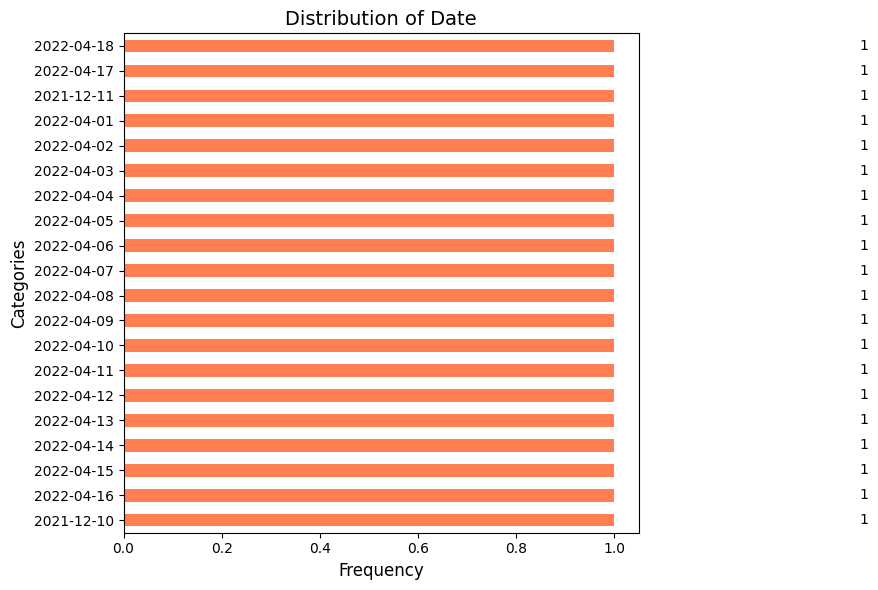

Column: Impressions
Missing Values Count: 0
Missing Values Percentage: 0.0


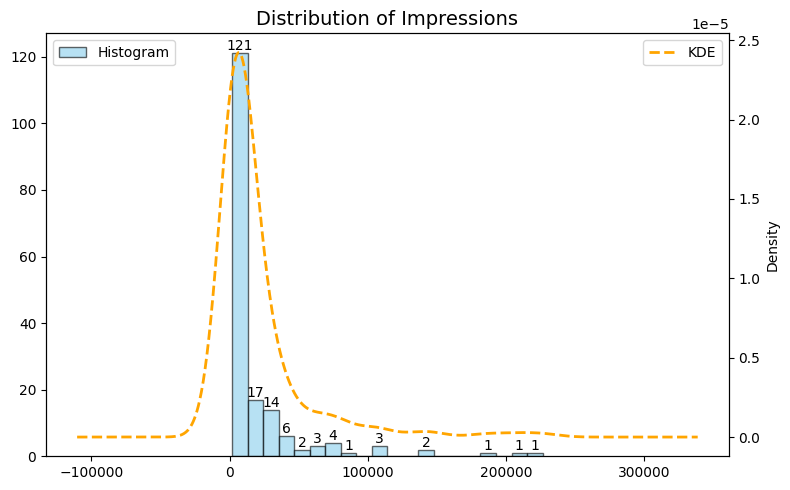

Column: From Home
Missing Values Count: 0
Missing Values Percentage: 0.0


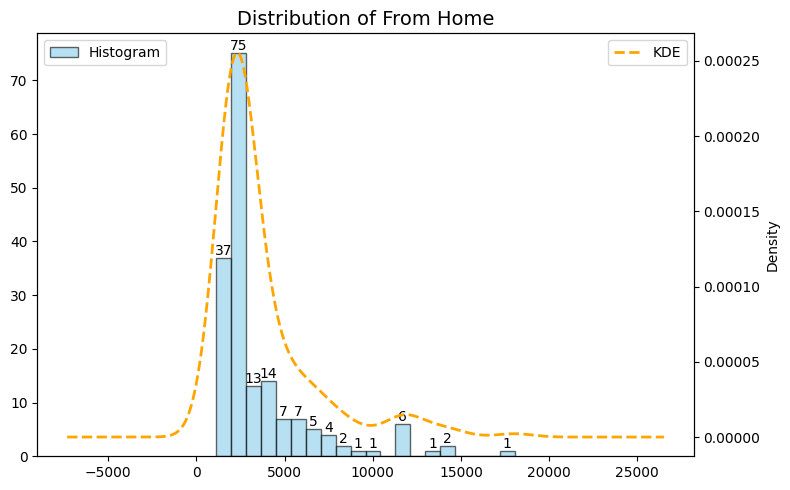

Column: From Hashtags
Missing Values Count: 0
Missing Values Percentage: 0.0


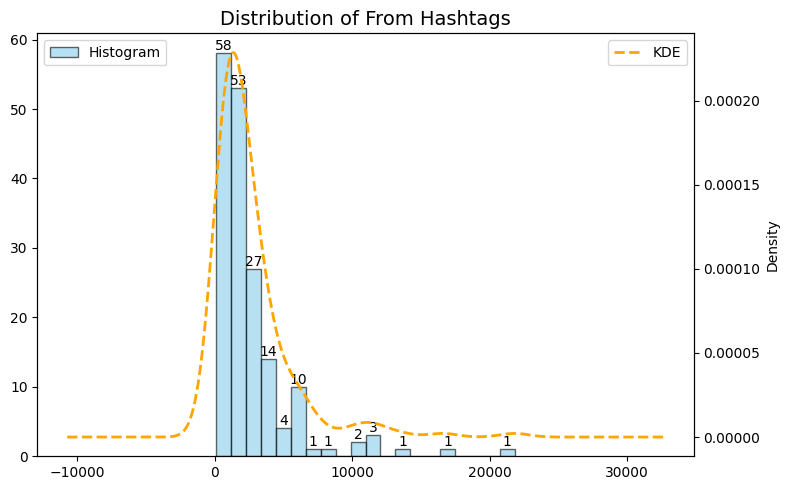

Column: From Explore
Missing Values Count: 0
Missing Values Percentage: 0.0


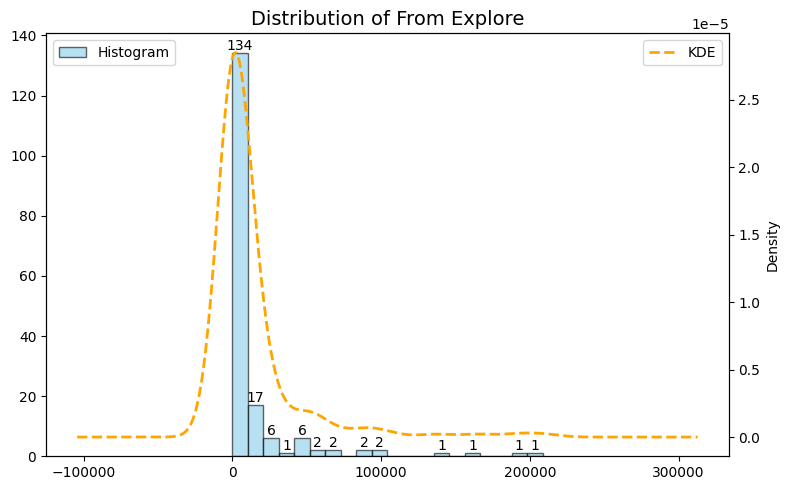

Column: From Other
Missing Values Count: 0
Missing Values Percentage: 0.0


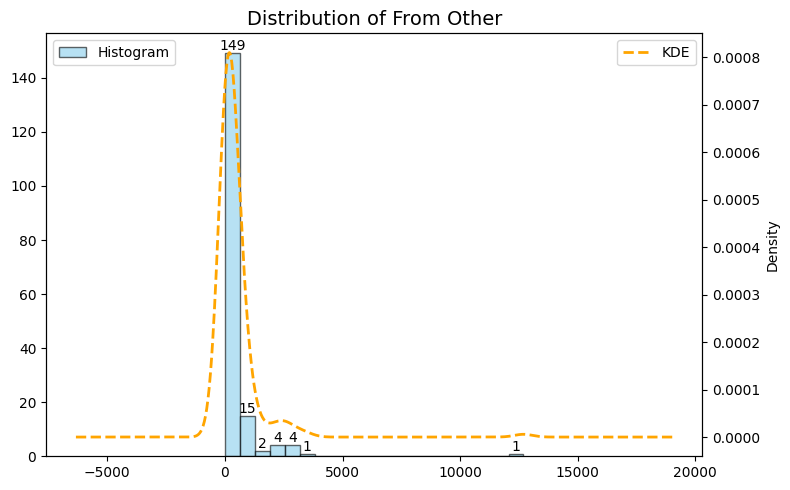

Column: Saves
Missing Values Count: 0
Missing Values Percentage: 0.0


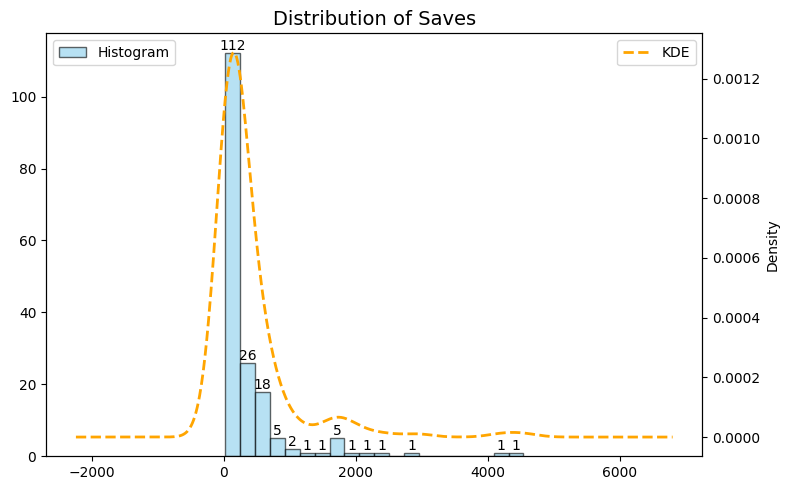

Column: Comments
Missing Values Count: 0
Missing Values Percentage: 0.0


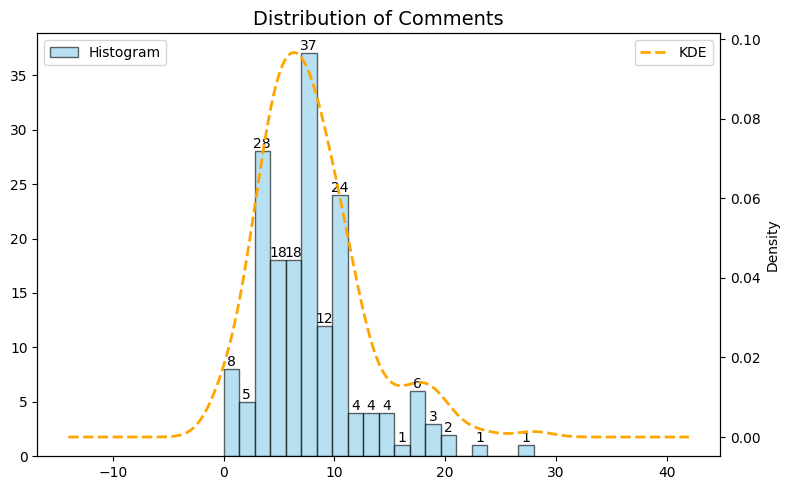

Column: Shares
Missing Values Count: 0
Missing Values Percentage: 0.0


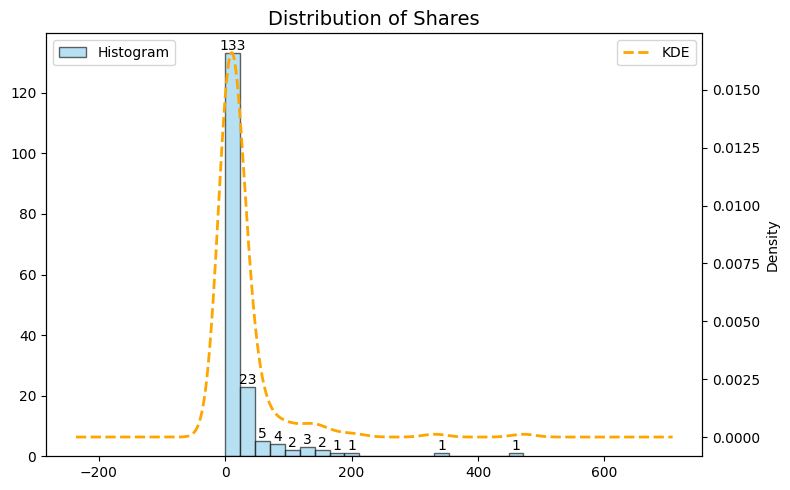

Column: Likes
Missing Values Count: 0
Missing Values Percentage: 0.0


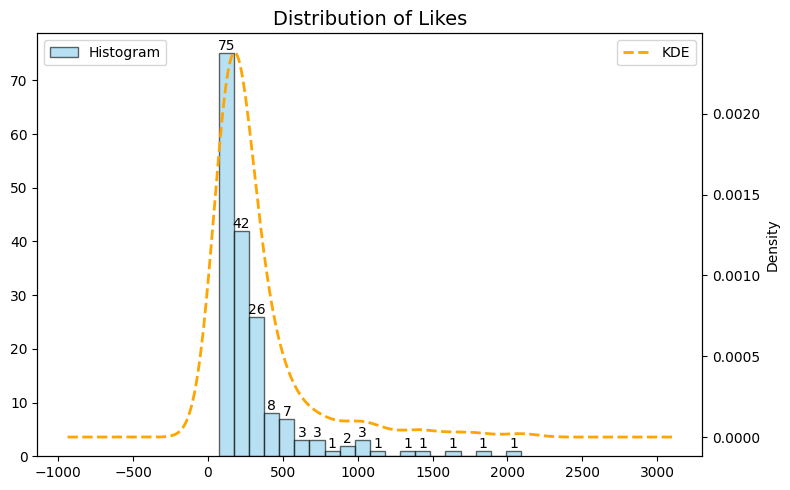

Column: Profile Visits
Missing Values Count: 0
Missing Values Percentage: 0.0


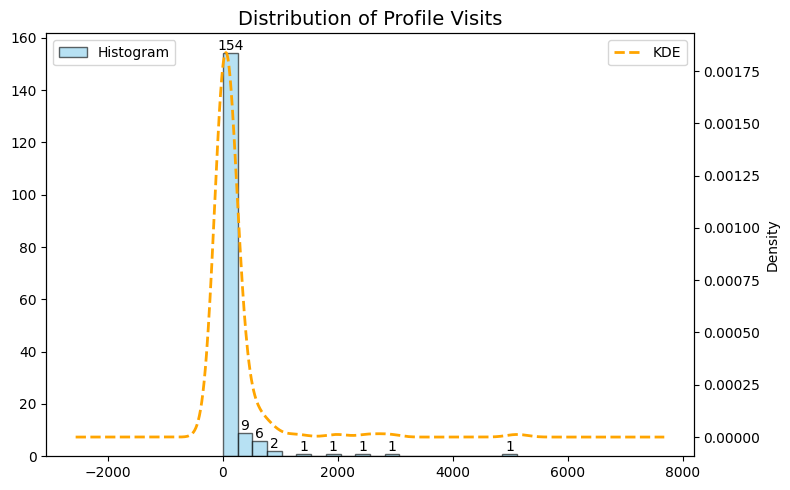

Column: Follows
Missing Values Count: 0
Missing Values Percentage: 0.0


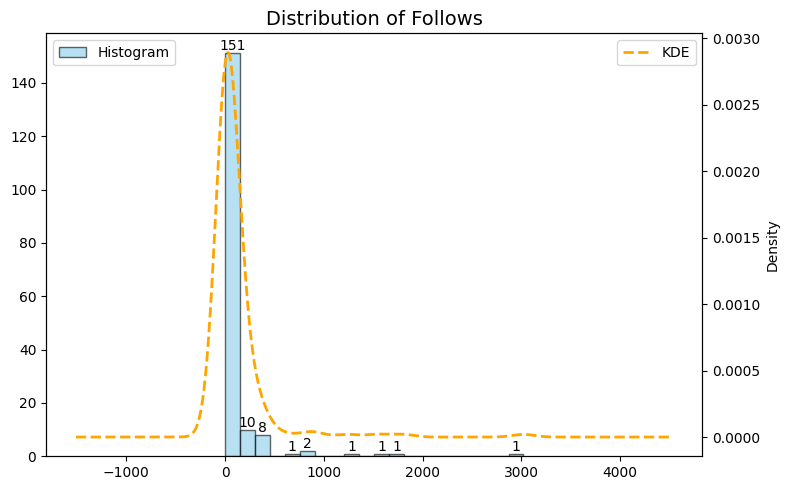

Column: Conversion Rate
Missing Values Count: 0
Missing Values Percentage: 0.0


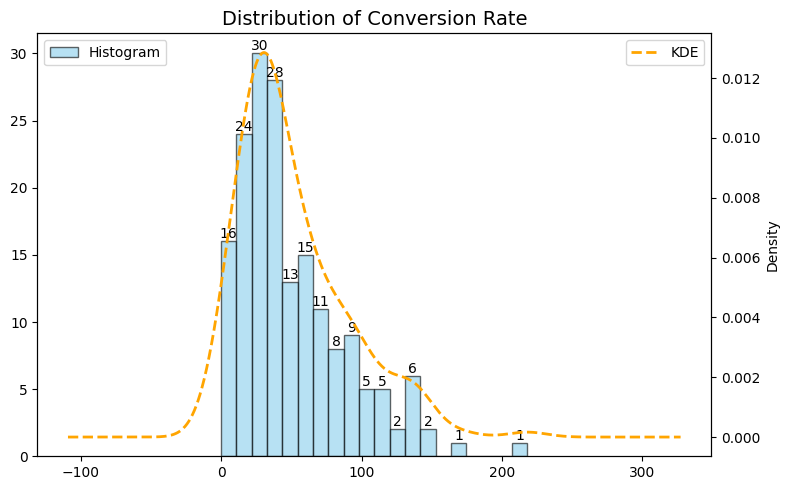

Column: datascience1
Missing Values Count: 37
Missing Values Percentage: 21.02


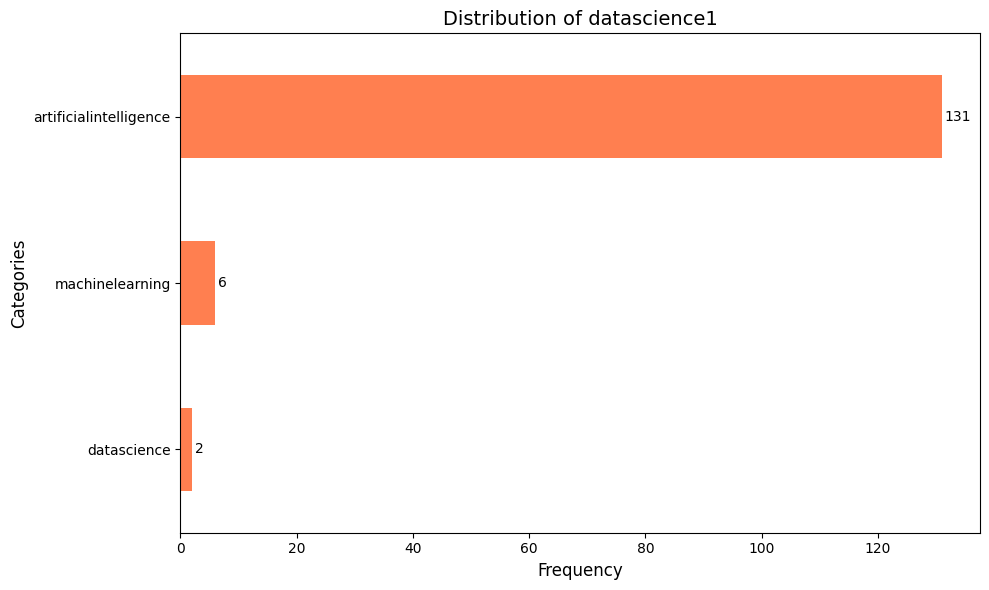

Column: others1
Missing Values Count: 0
Missing Values Percentage: 0.0


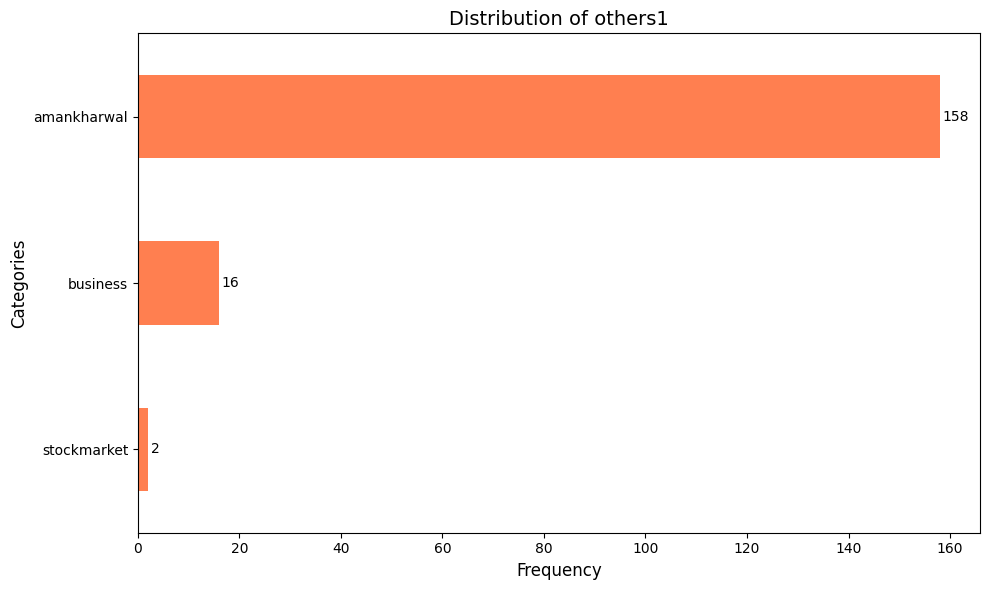

In [ ]:
from simple_colors import magenta
import matplotlib.pyplot as plt

# Loop through each column
for col in df.columns:
    # Check for categorical columns
    if df[col].dtype == object or df[col].dtype == bool:
        print(magenta("Column:", ['bold']), col)
        print(magenta("Missing Values Count:", ['bold']), df[col].isnull().sum())
        print(magenta("Missing Values Percentage:", ['bold']), round(df[col].isnull().mean() * 100, 2))

        # Plot top 20 categories sorted by frequency
        value_counts = df[col].value_counts().head(20).sort_values(ascending=True)
        ax = value_counts.plot(kind='barh', color='coral', figsize=(10, 6))

        # Annotate bar values
        for i, v in enumerate(value_counts.values):
            ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=10)

        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel('Frequency', fontsize=12)
        plt.ylabel('Categories', fontsize=12)
        plt.tight_layout()
        plt.show()

    # Check for numerical columns
    elif df[col].dtype in ['int32', 'int64', 'float32', 'float64']:
        print(magenta("Column:", ['bold']), col)
        print(magenta("Missing Values Count:", ['bold']), df[col].isnull().sum())
        print(magenta("Missing Values Percentage:", ['bold']), round(df[col].isnull().mean() * 100, 2))

        # Create a figure for histogram and KDE
        fig, ax1 = plt.subplots(figsize=(8, 5))

        # Plot histogram
        n, bins, patches = ax1.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.6, label='Histogram')

        # Plot KDE
        ax2 = ax1.twinx()  # Create a secondary y-axis
        df[col].plot(kind='kde', ax=ax2, color='orange', linestyle='--', linewidth=2, label='KDE')

        # Annotate histogram bin heights
        for patch, count in zip(patches, n):
            if count > 0:
                ax1.annotate(f'{int(count)}',
                             (patch.get_x() + patch.get_width() / 2, count),
                             ha='center', va='bottom', fontsize=10, color='black')


        # Add title and legends
        plt.title(f'Distribution of {col}', fontsize=14)
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        plt.tight_layout()
        plt.show()


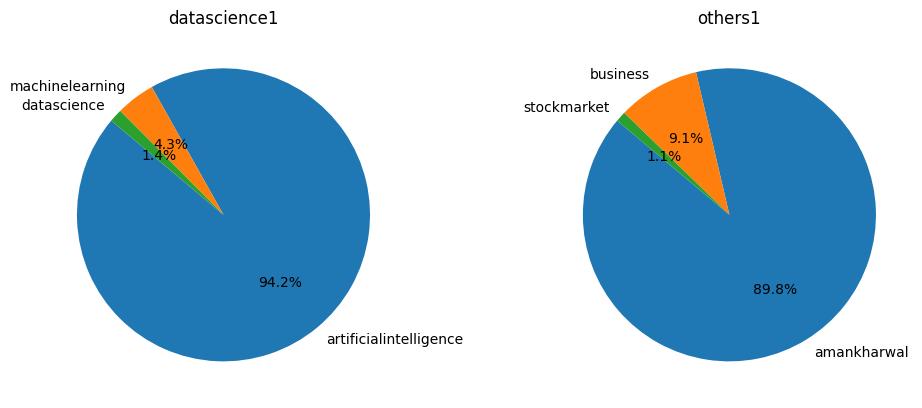

In [ ]:
 # pie chart in categorical columns
 plt.figure(figsize=(10, 8))
 columns = ['datascience1', 'others1']

 for i, j in enumerate(columns, start=1):
        circle1 = df[j].value_counts()
        plt.subplot(2, 2, i)
        plt.pie(circle1, labels=circle1.index, autopct='%1.1f%%', startangle=140)
        plt.title(j)

 plt.tight_layout()
 plt.show()


In [ ]:
df.select_dtypes(exclude='object').columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Conversion Rate'],
      dtype='object')

The goal is to understand how different sources like From Home, From Hashtags, From Explore, and From Other contribute to the total impressions generated by Instagram posts

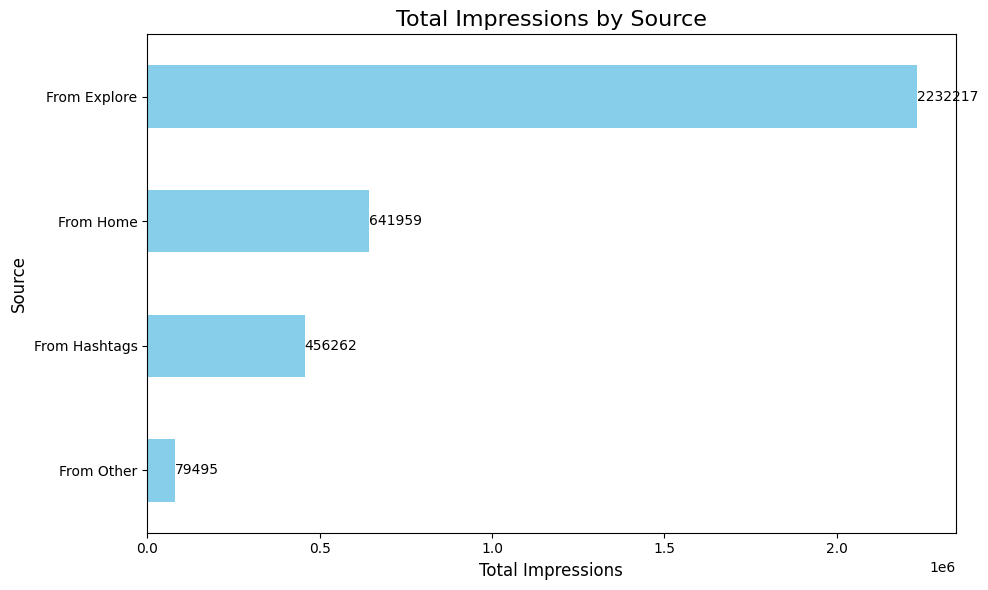

In [ ]:
# Plotting Total Impressions by Source
sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
impressions = df[sources].sum().sort_values()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
impressions.plot(kind='barh', color='skyblue', ax=ax)

# Add title and labels
plt.title('Total Impressions by Source', fontsize=16)
plt.xlabel('Total Impressions', fontsize=12)
plt.ylabel('Source', fontsize=12)

# Annotate bars with their values
for index, value in enumerate(impressions):
    ax.text(value + 5, index, str(value), va='center', fontsize=10)  # Offset text slightly to the right of the bar

plt.tight_layout()
plt.show()



We are comparing "Impressions" with engagement metrics like "Likes," "Comments," and "Shares" because "Impressions" represent how often a post is viewed, while engagement shows how users interact with it. This helps assess post performance.

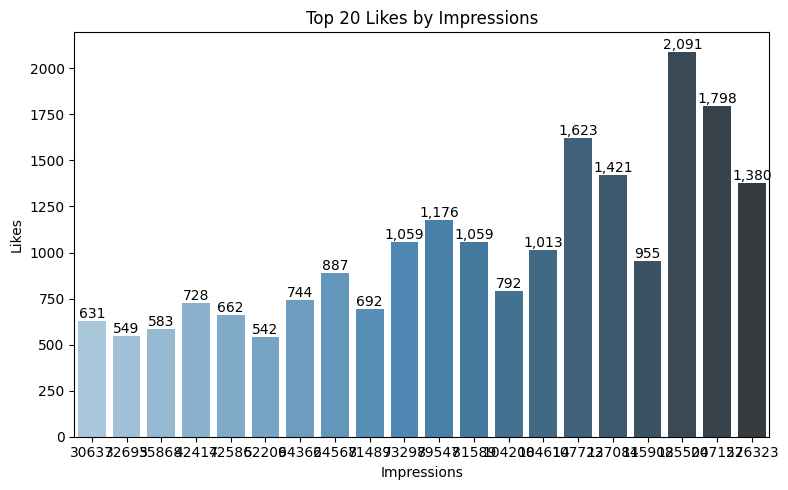

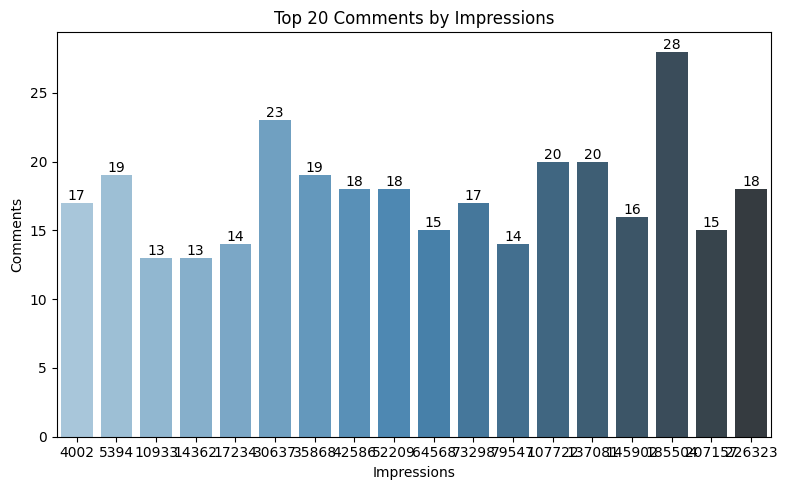

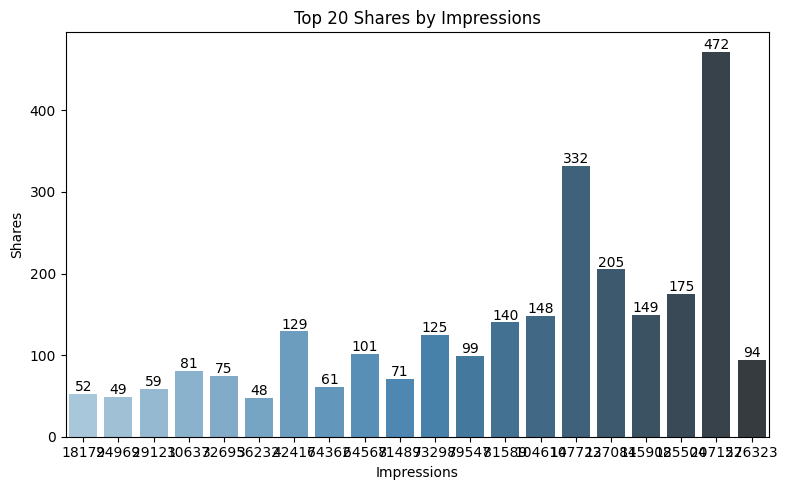

In [ ]:
# Define the engagement columns and source columns
engagement_columns = ['Likes', 'Comments', 'Shares']
source_columns = ['Impressions']

# Loop through engagement columns and plot against each source column
for engagement in engagement_columns:
    for source in source_columns:
            # Sort and select top 20
            top_20_data = df[[source, engagement]].sort_values(by=engagement, ascending=False).head(20)

            plt.figure(figsize=(8, 5))
            ax = sns.barplot(x=source, y=engagement, data=top_20_data, palette="Blues_d")
            plt.title(f"Top 20 {engagement} by {source}")
            plt.xlabel(source)
            plt.ylabel(engagement)

            # Annotate bars with the values of 'Impressions'
            for p in ax.patches:
                ax.annotate(f'{p.get_height():,.0f}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black',
                            xytext=(0, 5), textcoords='offset points')

            plt.tight_layout()
            plt.show()


The code visualizes the relationship between categorical columns (like datascience1 and others1) and numerical columns in the dataset

In [ ]:
df.columns

Index(['Date', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Conversion Rate', 'datascience1', 'others1'],
      dtype='object')

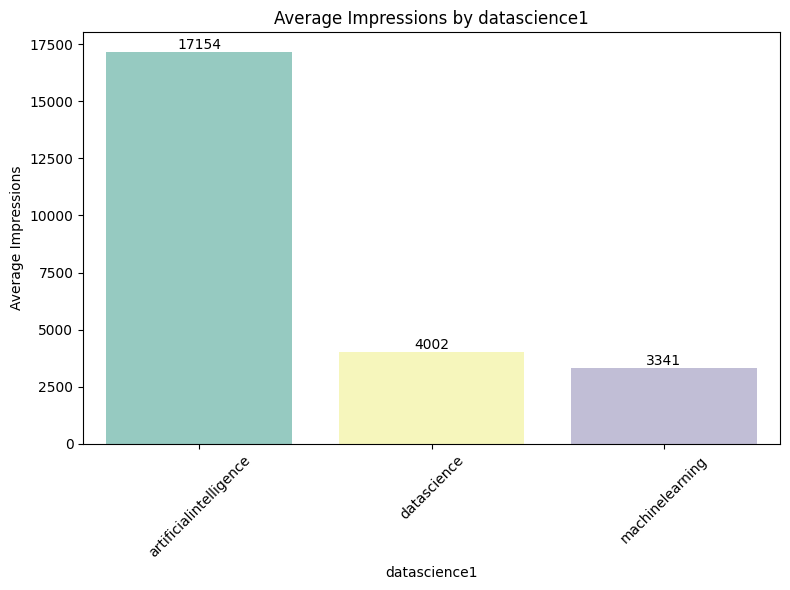

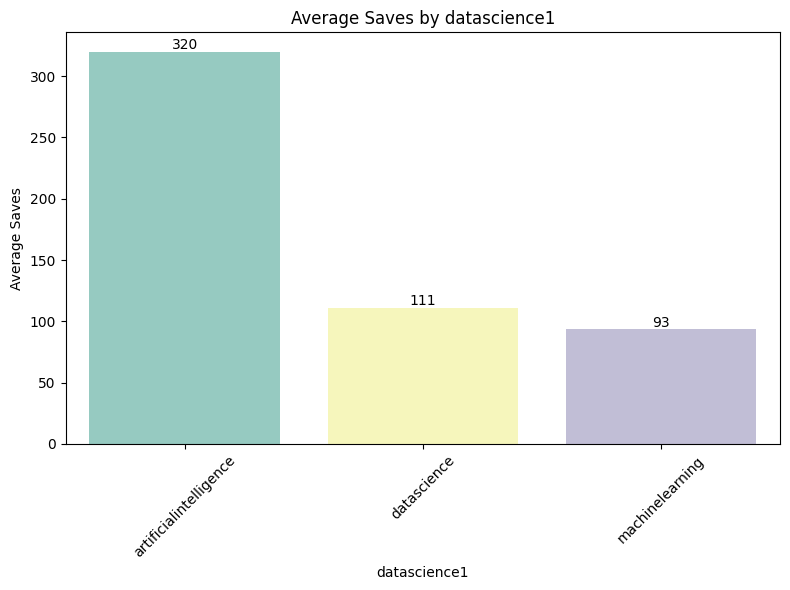

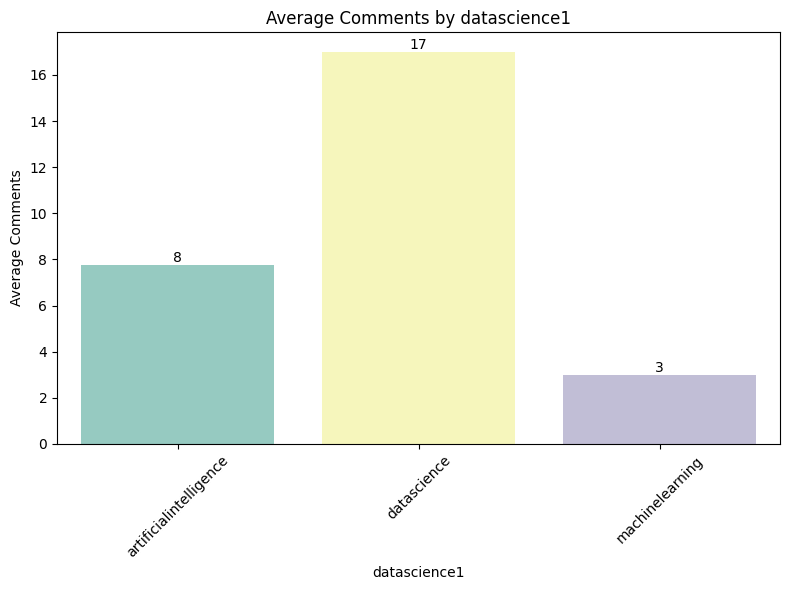

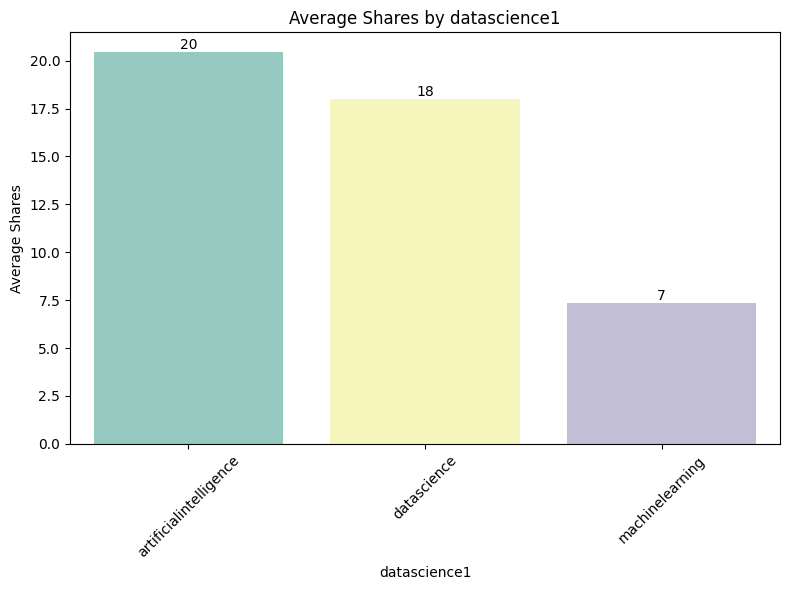

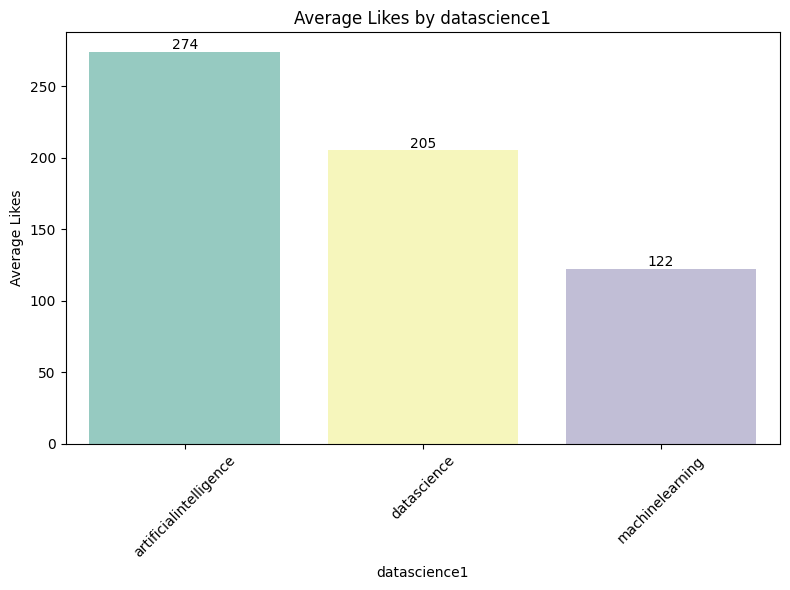

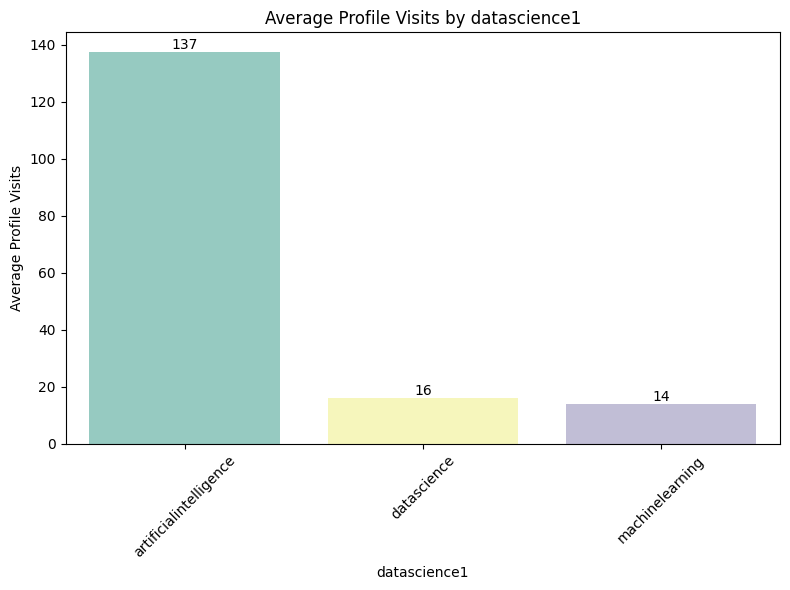

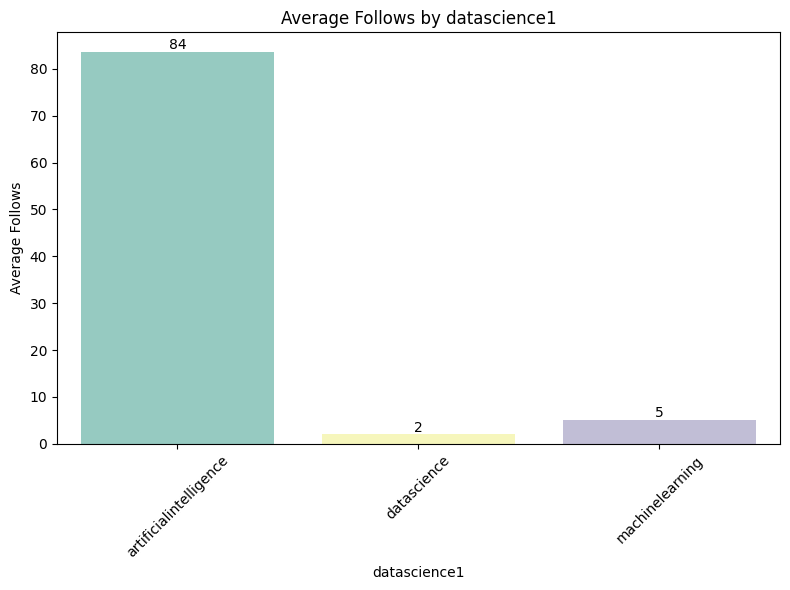

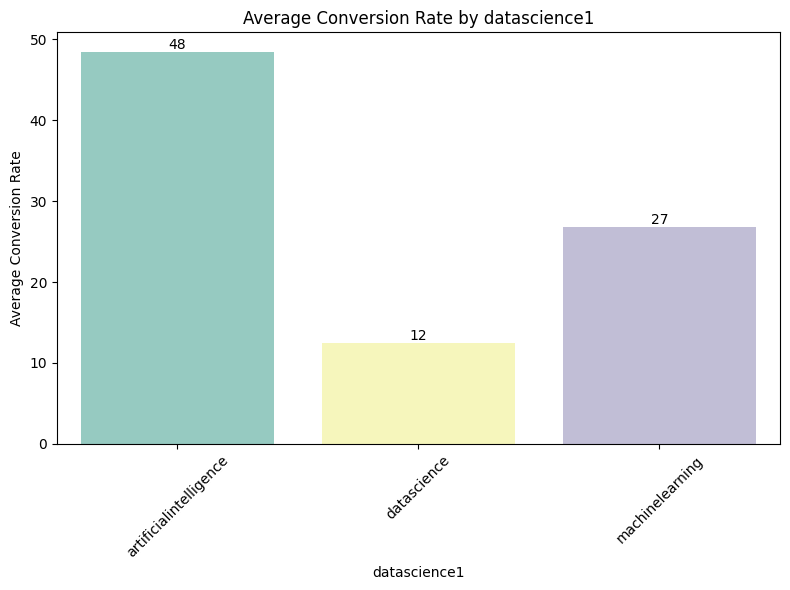

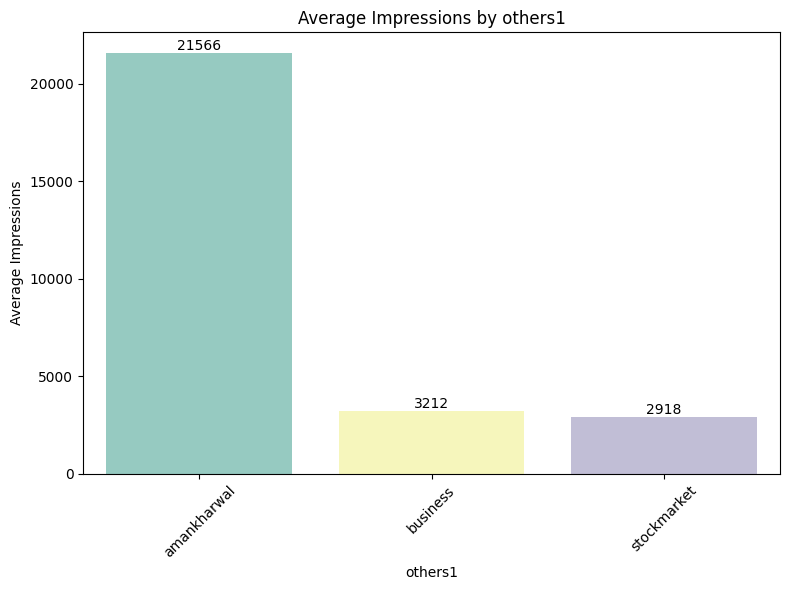

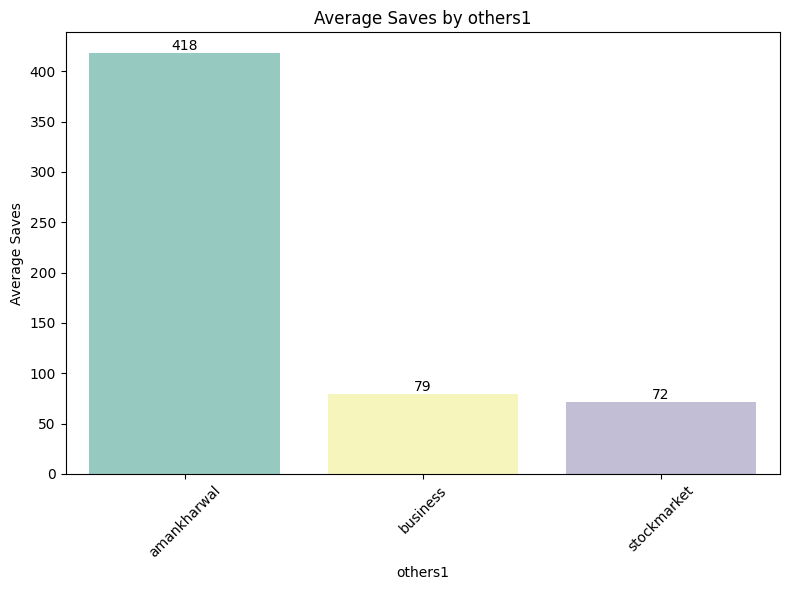

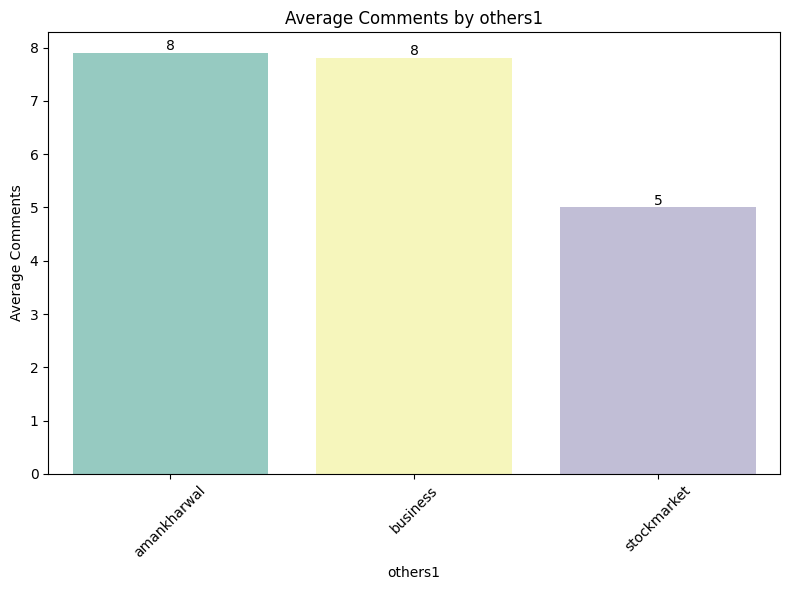

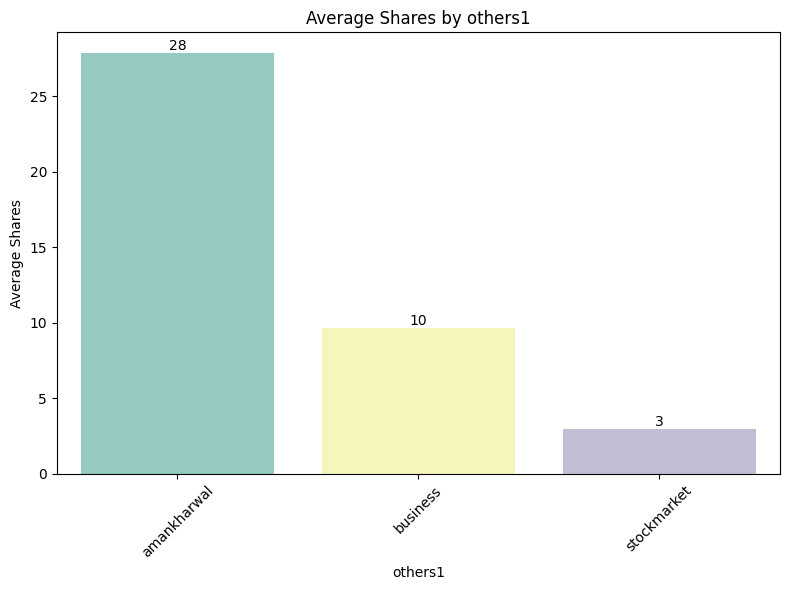

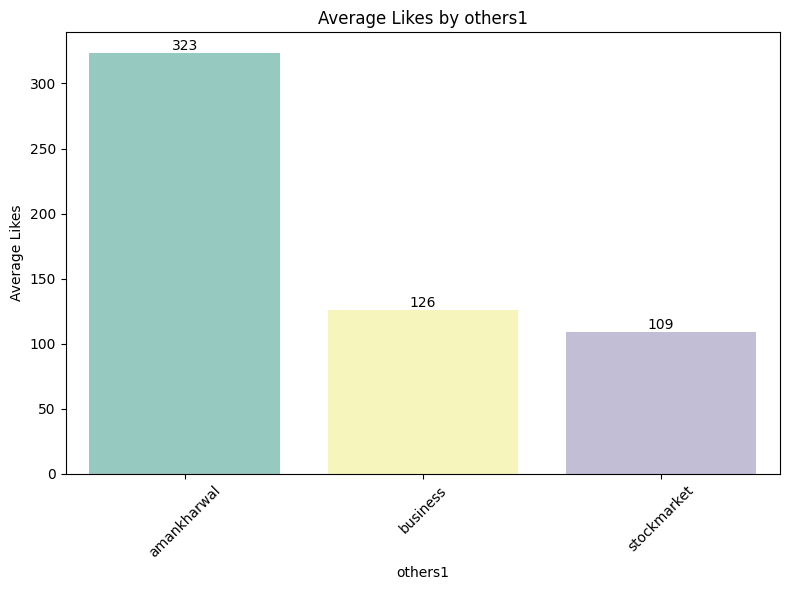

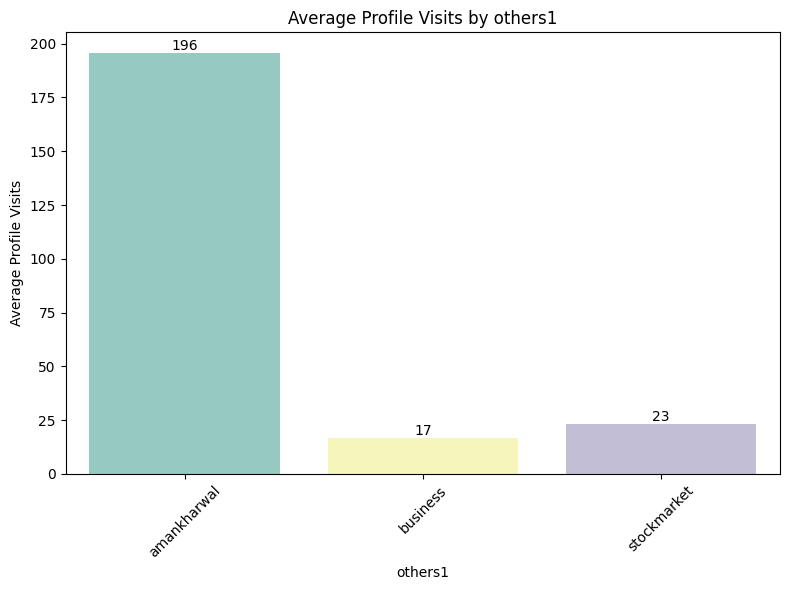

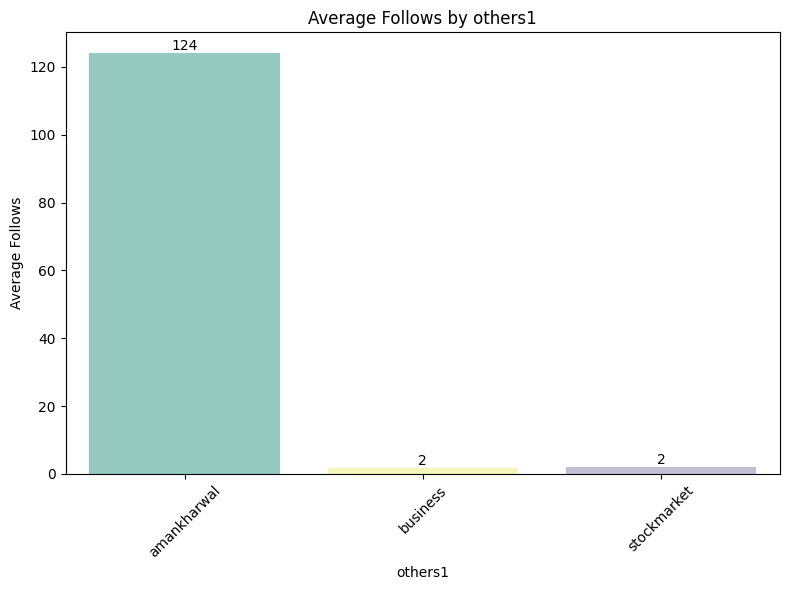

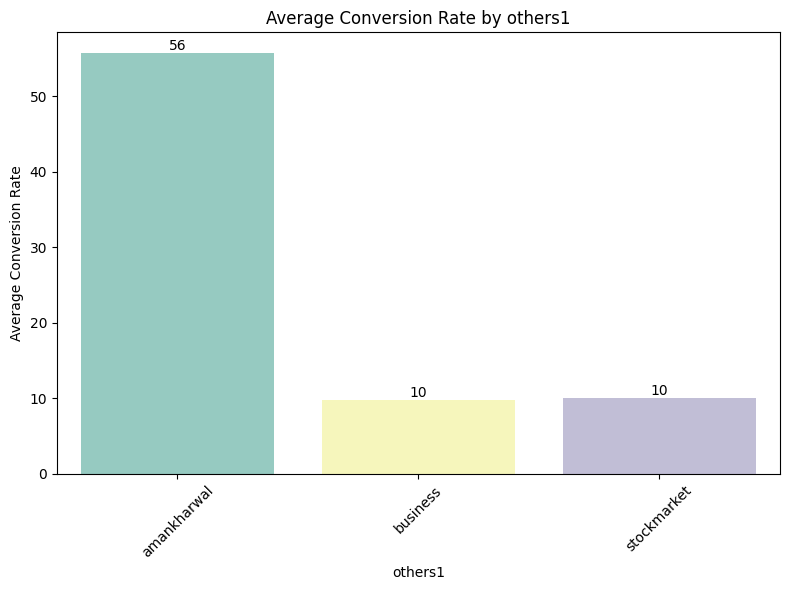

In [ ]:
label = ['datascience1', 'others1']
label1=['Impressions','Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Conversion Rate']
for cat_col in label:
    for num_col in label1:
        # Aggregate numerical data by category
        agg_data = df.groupby(cat_col)[num_col].mean().reset_index()

        # Create a bar chart
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(data=agg_data, x=cat_col, y=num_col, palette="Set3")

        # Annotate bars with the values of 'num_col'
        for p in ax.patches:
            ax.annotate(f'{int(round(p.get_height()))}',  # Convert to integer
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')

        plt.title(f"Average {num_col} by {cat_col}")
        plt.ylabel(f"Average {num_col}")
        plt.xlabel(cat_col)
        plt.xticks(rotation=45)  # Rotate labels for better readability
        plt.tight_layout()
        plt.show()


A correlation heatmap for all numeric columns visualizes relationships between variables, highlighting strong positive or negative correlations. It helps identify patterns, such as the link between 'Impressions', 'From Home', 'From Hashtags', 'From Explore','From Other', 'Saves', 'Comments', 'Shares', 'Likes''Profile Visits','Follows',and 'Conversion Rate' and reveals potential multicollinearity within the dataset.


Bivariate

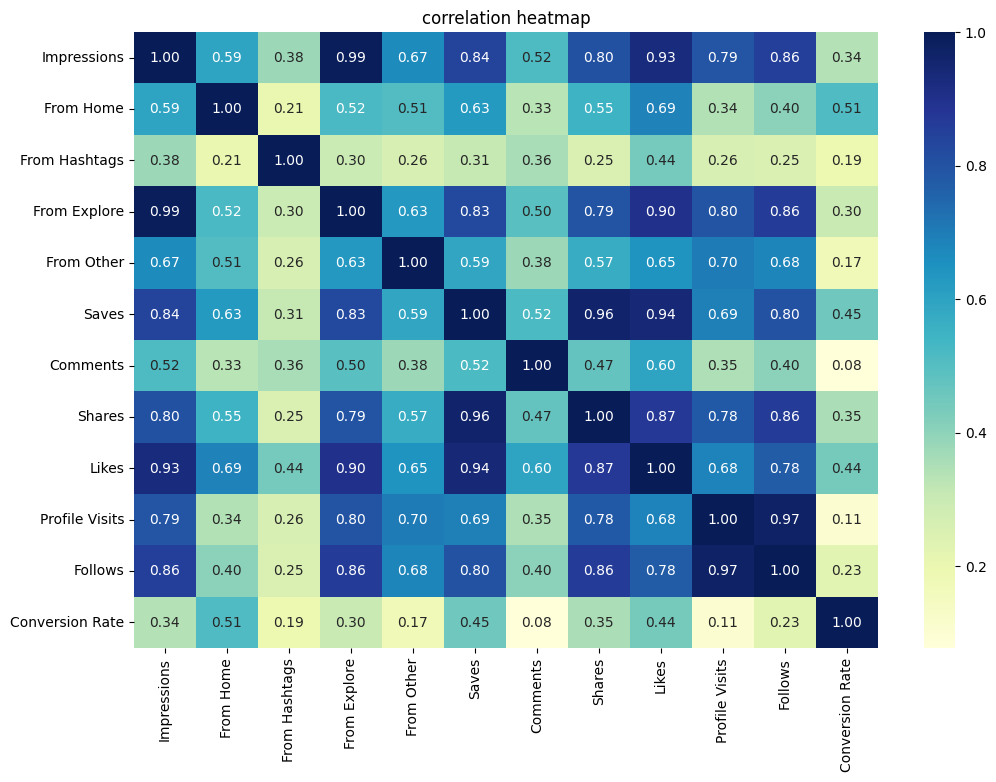

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap="YlGnBu",fmt=".2f")
plt.title("correlation heatmap")
plt.show()

Numerical vs Numerical


The correlation between "Impressions" and "Likes" in the dataset is 0.93, indicating a very strong positive linear relationship. This means that posts with higher impressions tend to receive more likes.

In [ ]:
import plotly.express as px  # Import the plotly express module

fig = px.scatter(df,
                 x='Impressions',
                 y='Likes',

                 trendline_color_override='black',
                 width=700,
                 height=450)

# Display the scatter plot
fig.show()


In [ ]:
df.columns

Index(['Date', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Conversion Rate', 'datascience1', 'others1'],
      dtype='object')


The correlation between "Impressions" and "Saves" in the dataset is 0.84, indicating a strong positive linear relationship. This suggests that as the number of impressions for a post increases, it is more saves also increases.

In [ ]:
fig = px.scatter(df,
                 x='Impressions',
                 y='Saves',

                 trendline_color_override='black',
                 width=700,
                 height=450)

# Display the scatter plot
fig.show()


The correlation between "Profile Visits" and "Follows" in the dataset is 0.97, indicating a very strong positive linear relationship. As profile visits increase, follows also increase.

In [ ]:
fig = px.scatter(df,
                 x='Profile Visits',
                 y='Follows',

                 trendline_color_override='black',
                 width=700,
                 height=450)

# Display the scatter plot
fig.show()

Conversion Rate=( Follows/prfile visits)X 100

The code calculates a new metric, conversion_rate_new, as the percentage of followers to profile visits. A scatter plot visualizes its relationship with the conversion rate, including a trendline for correlation insights.

In [ ]:
df['conversion_rate_new'] = (df['Follows'] / df['Profile Visits']) * 100

# Creating the scatter plot
fig = px.scatter(
    df,
    x='conversion_rate_new',
    y='Conversion Rate',
    trendline="ols",  # Adds a trendline
    trendline_color_override='black',
    width=700,
    height=450
)

fig.show()


In [ ]:
df = df.drop(columns=['conversion_rate_new'])

Impressions:
Total number of times the content was viewed.

From Home:
Number of impressions that came from the home feed (main Instagram feed).

From Hashtags:
Number of impressions gained via hashtags.

From Explore:
Impressions generated through the "Explore" page on Instagram.

From Other:
Impressions from other sources (e.g., profile page, direct shares, etc.).

The relationship blw all columns= From Home (500) + From Explore (200) + From Hashtags (150) + From Other (150) = 1,000 Impressions.


In [ ]:
df["allviews"]=df['From Home']+df['From Hashtags']+df['From Explore']+df['From Other']

fig = px.scatter(
    df,
    x='allviews',
    y='Impressions',
    trendline="ols",  # Adds a trendline
    trendline_color_override='black',
    width=700,
    height=450
)

fig.show()



In [ ]:
df=df.drop(columns=['allviews'])

Multivariate

The correlation between "Impressions" and "Likes" in the dataset is 0.93, indicating a very strong positive linear relationship. This means that posts with higher impressions tend to receive more likes. Both impressions and likes increase, and shares also tend to increase.

In [ ]:
import plotly.express as px

# Example: Scatter Plot using Plotly Express
fig = px.scatter(
    df,
    x='Impressions',
    y='Likes',
    size='Shares',
    color='Shares',
    color_continuous_scale='viridis',
    title='Scatter Plot: Impressions vs Likes',
    labels={'Impressions': 'Impressions', 'Likes': 'Likes'}
)

fig.update_traces(marker=dict(sizeref=0.5))
fig.show()


Conversion Rate=( Follows/prfile visits or Impressions)X 100


The correlation between "Profile Visits" and "Follows" in the dataset is 0.97, indicating a strong positive linear relationship. This suggests that as the number of profile visits increases, it is more likely to result in additional followers. Followers increase, profile visits decrease, and the conversion rate increases.

In [ ]:
import plotly.express as px

# Create scatter plot
fig = px.scatter(
    df,
    x='Profile Visits',
    y='Follows',
    size='Conversion Rate',  # Use 'Conversion Rate' to control bubble size
    color='Conversion Rate',  # Color based on 'Conversion Rate'
    color_continuous_scale='viridis',  # Optional color scale
    title='Scatter Plot: Profile Visits vs Follows',
    labels={'Profile Visits': 'Profile Visits', 'Follows': 'Follows', 'Conversion Rate': 'Conversion Rate'}
)

# Update marker properties to fine-tune bubble appearance
fig.update_traces(marker=dict(sizeref=0.5))  # Adjust sizeref for size scaling

# Display the plot
fig.show()


Conversion Rate=( Follows/prfile visits or Impressions)X 100


The correlation between "Impressions" and "Follows" in the dataset is 0.86, indicating a strong positive linear relationship. This suggests that as the number of impressions for a post increases, it is more likely to result in additional followers. Followers increase, impressions decrease, and the conversion rate increases.

In [ ]:
# Example: Scatter Plot using Plotly Express
fig = px.scatter(
    df,
    x='Impressions',
    y='Follows',
    color='Conversion Rate',
    size='Conversion Rate',
    color_continuous_scale='viridis',  # Optional color
    title='Scatter Plot: Impressions vs Follows',
    labels={'Impressions': 'Impressions', 'Follows': 'Follows'}
)

fig.update_traces(marker=dict(sizeref=0.5))

fig.show()


The columns "Impressions," "Likes," "Shares," "Saves," "Comments," and "Follows" are strongly interrelated. Higher impressions typically lead to more likes, shares, and comments, suggesting that more visibility increases engagement. Similarly, higher engagement tends to drive more follows.

In [ ]:
# Select columns for the pairplot
pairplot_columns = ['Impressions', 'Shares', 'Saves', 'Comments', 'Follows']

# Create the scatter matrix
fig = px.scatter_matrix(df,
                        dimensions=pairplot_columns,
                        title='Pairwise Scatter Matrix of Key Metrics',
                        size='Likes',
                        color='Likes')

# Show the plot
fig.update_layout(width=1200, height=1000)
fig.show()
